In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

%matplotlib inline

In [2]:
raw = pd.read_csv('../raw/train.csv', index_col= 'action_time', parse_dates=True)
raw['timestamp'] = raw.index
raw

,user_id,item_id,cate_id,action_type,timestamp
action_time,,,,,
1487174400,11482147,492681,1_11,view,1487174400
1487174400,12070750,457406,1_14,deep_view,1487174400
1487174400,12431632,527476,1_1,view,1487174400
1487174400,13397746,531771,1_6,deep_view,1487174400
1487174400,13794253,510089,1_27,deep_view,1487174400
1487174400,14378544,535335,1_6,deep_view,1487174400
1487174400,1705634,535202,1_10,view,1487174400
1487174400,6943823,478183,1_3,deep_view,1487174400
1487174401,5902475,524378,1_6,view,1487174401


In [3]:
ts = pd.to_datetime((raw.index + 60*60*8) * 10 ** 9) 
rawd = pd.DataFrame(data= raw.values, index=ts, columns=raw.columns)
rawd.head()

,user_id,item_id,cate_id,action_type,timestamp
action_time,,,,,
2017-02-16,11482147,492681,1_11,view,1487174400
2017-02-16,12070750,457406,1_14,deep_view,1487174400
2017-02-16,12431632,527476,1_1,view,1487174400
2017-02-16,13397746,531771,1_6,deep_view,1487174400
2017-02-16,13794253,510089,1_27,deep_view,1487174400


In [4]:
view = {}
for i in rawd.action_type:
    if i not in view:
        view[i] = 0
    view[i] += 1
print(view)


rawd['view'] = [1 if x == 'view' else 0 for x in rawd.action_type]
rawd['deep_view'] = [1 if x == 'deep_view' else 0 for x in rawd.action_type]
rawd['collect'] = [1 if x == 'collect' else 0 for x in rawd.action_type]
rawd['share'] = [1 if x == 'share' else 0 for x in rawd.action_type]
rawd['comment'] = [1 if x == 'comment' else 0 for x in rawd.action_type]

rawd

{'collect': 10884, 'view': 1815636, 'share': 459, 'comment': 4320, 'deep_view': 1440744}


,user_id,item_id,cate_id,action_type,timestamp,view,deep_view,collect,share,comment
action_time,,,,,,,,,,
2017-02-16 00:00:00,11482147,492681,1_11,view,1487174400,1,0,0,0,0
2017-02-16 00:00:00,12070750,457406,1_14,deep_view,1487174400,0,1,0,0,0
2017-02-16 00:00:00,12431632,527476,1_1,view,1487174400,1,0,0,0,0
2017-02-16 00:00:00,13397746,531771,1_6,deep_view,1487174400,0,1,0,0,0
2017-02-16 00:00:00,13794253,510089,1_27,deep_view,1487174400,0,1,0,0,0
2017-02-16 00:00:00,14378544,535335,1_6,deep_view,1487174400,0,1,0,0,0
2017-02-16 00:00:00,1705634,535202,1_10,view,1487174400,1,0,0,0,0
2017-02-16 00:00:00,6943823,478183,1_3,deep_view,1487174400,0,1,0,0,0
2017-02-16 00:00:01,5902475,524378,1_6,view,1487174401,1,0,0,0,0


action_type
share            459
comment         4320
collect        10884
deep_view    1440744
view         1815636
Name: action_type, dtype: int64


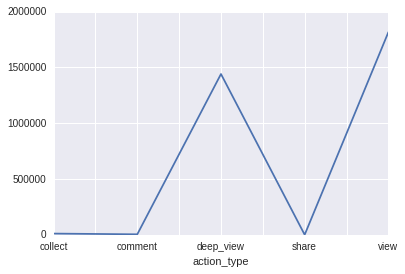

In [5]:
print(rawd.action_type.groupby(rawd.action_type).count().sort_values())
rawd.action_type.groupby(rawd.action_type).count().plot()

# sns.distplot(rawd.action_type)

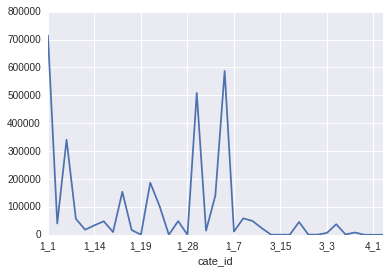

In [6]:
rawd.cate_id.groupby(rawd.cate_id).count().sort_values(ascending=False)
rawd.cate_id.groupby(rawd.cate_id).count().plot()

In [7]:
## 保存结果
rawd.to_pickle('../pkl/process.train.pkl')
rawd.head()

,user_id,item_id,cate_id,action_type,timestamp,view,deep_view,collect,share,comment
action_time,,,,,,,,,,
2017-02-16,11482147,492681,1_11,view,1487174400,1,0,0,0,0
2017-02-16,12070750,457406,1_14,deep_view,1487174400,0,1,0,0,0
2017-02-16,12431632,527476,1_1,view,1487174400,1,0,0,0,0
2017-02-16,13397746,531771,1_6,deep_view,1487174400,0,1,0,0,0
2017-02-16,13794253,510089,1_27,deep_view,1487174400,0,1,0,0,0


,item_id,cate_id,timestamp
0,493659,1_1,1486744638
1,481181,1_17,1486598042
2,486720,1_11,1486684315
3,559008,1_11,1487372097
4,523054,1_23,1486972971
5,523057,1_7,1486972979
6,523056,1_6,1486972977
7,523051,1_17,1486972961
8,523053,1_6,1486972963
9,494920,1_18,1486771984


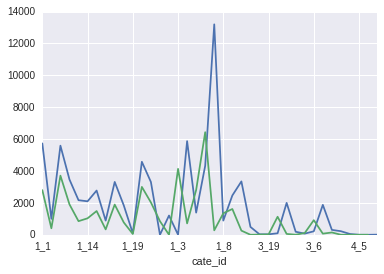

In [8]:
old_news = pd.read_csv('../raw/all_news_info.csv')
news = pd.read_csv('../raw/news_info.csv')

# 查看分类类别
old_news.cate_id.groupby(old_news.cate_id).count().plot()
news.cate_id.groupby(news.cate_id).count().plot()

old_news

In [27]:
d_onews = pd.to_datetime((old_news.timestamp + 60*60*8) * 10 ** 9)
old_news['date'] = d_onews
# old_news.to_pickle('../pkl/process.all_news.pkl')

d_news = pd.to_datetime((news.timestamp + 60*60*8) * 10 ** 9)
news['date'] = d_news
# news.to_pickle('../pkl/process.news.pkl')

news.index = news.date
old = news.sort_index(ascending=False)
# old[old.cate_id == '1_1']
old.to_pickle('../pkl/process.news.pkl')